In [ ]:
from google.colab import files
uploaded = files.upload()



Saving dataset.csv to dataset.csv


     Unnamed: 0   00001   0001 KUG 2357+228  33.73  0.37   55.8  \
26            R    28.0   11.0          WLM  24.81  0.04  0.916   
27          NaN    29.0   11.0          WLM  24.84  0.14  0.929   
28            R    30.0   11.0          WLM  24.89  0.07  0.951   
29          NaN    31.0   11.0          WLM  24.90  0.18  0.955   
30          NaN    32.0   11.0          WLM  24.92  0.21  0.964   
...         ...     ...    ...          ...    ...   ...    ...   
1447        NaN  1327.0  296.0  MESSIER 110  24.68  0.35  0.863   
1448        NaN  1328.0  296.0  MESSIER 110  24.38   NaN  0.752   
1449          R  1329.0  296.0  MESSIER 110  24.55   NaN  0.813   
1450        NaN  1330.0  296.0  MESSIER 110  24.23  0.80  0.700   
1451          R  1331.0  296.0  MESSIER 110  22.91   NaN  0.382   

       Tully-Fisher  2009ApJS..182..474S Unnamed: 9  Unnamed: 10  Unnamed: 11  \
26         Cepheids  2010arXiv1012.4940T        NaN          NaN          NaN   
27         Cepheids  2007A&A...46

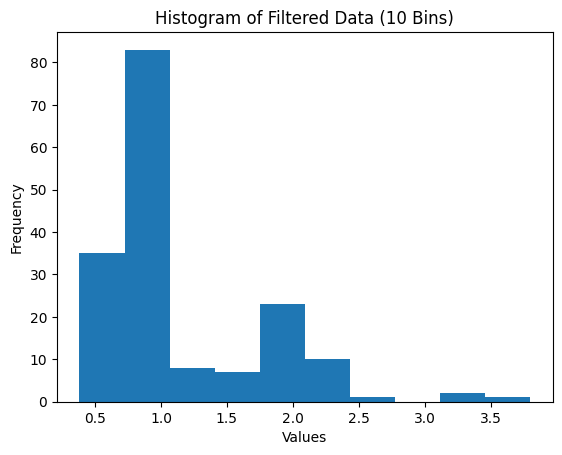

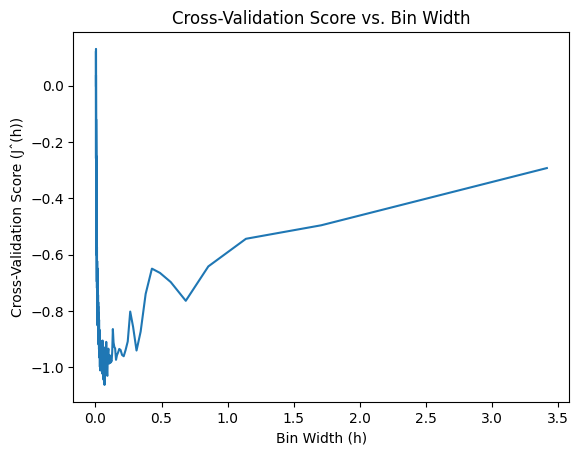

The optimal bin width (bandwidth) is: 0.06835999999999999


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

filename=list(uploaded.keys())[0]

header=pd.read_csv(io.BytesIO(uploaded[filename]),skiprows=12, nrows=1)
#print(header)
df= pd.read_csv(io.BytesIO(uploaded[filename]), skiprows=13, nrows=1500)
#print(df.iloc[10,6])
# Assuming the 7th column is the 6th index (since indexing starts at 0)
filtered_df = df[df.iloc[:, 6] < 4]

# Display the filtered DataFrame
print(filtered_df)

# Extract the data for the histogram (7th column)
data = filtered_df.iloc[:, 6].dropna()  # Drop NaN values for the histogram

# Plot the histogram
plt.figure(1)
plt.hist(data, bins=10)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Filtered Data (10 Bins)")

# Calculate estimated probabilities for each bin
hist, bin_edges = np.histogram(data, bins=10, density=True)


plt.figure(2)
n = len(data)  # Number of data points
cv_scores = []
bin_widths = []

for num_bins in range(1, 1001):
    h = (data.max() - data.min()) / num_bins  # Bin width
    hist, bin_edges = np.histogram(data, bins=num_bins, density=True)
    estimated_probabilities = hist * np.diff(bin_edges)

    cv_score = (2 / ((n - 1) * h)) - (((n + 1) / ((n - 1) * h)) * np.sum(estimated_probabilities**2))

    cv_scores.append(cv_score)
    bin_widths.append(h)

# Plot the cross-validation scores
plt.plot(bin_widths, cv_scores)
plt.xlabel("Bin Width (h)")
plt.ylabel("Cross-Validation Score (Jˆ(h))")
plt.title("Cross-Validation Score vs. Bin Width")

# Save the plot
plt.savefig("crossvalidation.png")

plt.show()

# Find the index of the minimum cross-validation score
optimal_idx = np.argmin(cv_scores)

# Get the optimal bin width
optimal_bin_width = bin_widths[optimal_idx]

# Print the optimal bin width
print(f"The optimal bin width (bandwidth) is: {optimal_bin_width}")


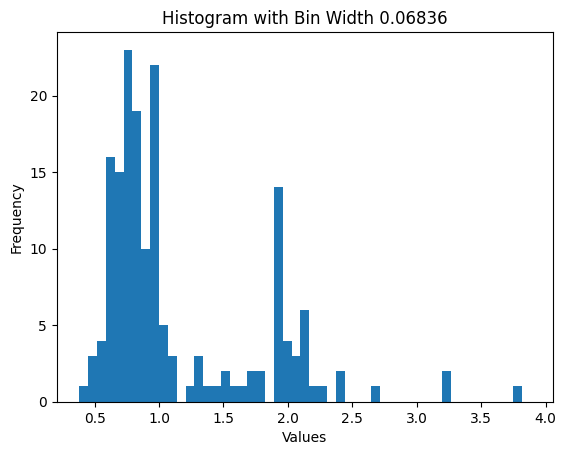

In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is already filtered as per your earlier code and contains the 7th column's data.
# You mentioned bin width (0.06836) and range (4).

# Calculate the number of bins
bin_width = 0.06836
data_range = 3.5
num_bins = int(data_range / bin_width)

# Plot the histogram with the specified bin width
plt.figure(1)
plt.hist(data, bins=num_bins, range=(data.min(), data.min() + data_range))  # setting the range explicitly
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title(f"Histogram with Bin Width {bin_width}")

# Calculate estimated probabilities for each bin
hist, bin_edges = np.histogram(data, bins=num_bins, range=(data.min(), data.min() + data_range), density=True)

# Show the plot
plt.show()
